In [ ]:
#!pip install pandas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [ ]:
df = pd.read_csv('data.csv')

## Iformações sobre o Dataframe

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.shape

(891, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.describe().round(2)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.00,891.00,891.00,714.00,891.00,891.00,891.00
mean,446.00,0.38,2.31,29.70,0.52,0.38,32.20
std,257.35,0.49,0.84,14.53,1.10,0.81,49.69
min,1.00,0.00,1.00,0.42,0.00,0.00,0.00
25%,223.50,0.00,2.00,20.12,0.00,0.00,7.91
50%,446.00,0.00,3.00,28.00,0.00,0.00,14.45
75%,668.50,1.00,3.00,38.00,1.00,0.00,31.00
max,891.00,1.00,3.00,80.00,8.00,6.00,512.33


## Tratar valores nulos


In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df.dropna(axis=1, thresh=177, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [ ]:
df[df['Survived'] == 1][df['Pclass'] == 1][df['Sex'] == 'female'][df['Age'] > 37]['Embarked'].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


C    18
S    14
Name: Embarked, dtype: int64

In [ ]:
df['Embarked'].fillna('C', inplace=True)
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [ ]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [ ]:
df[df["Age"].isna()]['Sex'].value_counts()

male      124
female     53
Name: Sex, dtype: int64

In [ ]:
df[df["Age"].isna()]['Survived'].value_counts()

0    125
1     52
Name: Survived, dtype: int64

In [ ]:
print('médiana de idade para sobrevivente masculino: ', df[df['Survived'] == 1][df['Sex'] == 'male']['Age'].median())
print('médiana de idade para sobrevivente feminina: ', df[df['Survived'] == 1][df['Sex'] == 'female']['Age'].median())

print('médiana de idade para não-sobrevivente masculino: ', df[df['Survived'] == 0][df['Sex'] == 'male']['Age'].median())
print('médiana de idade para não-sobrevivente feminina: ', df[df['Survived'] == 0][df['Sex'] == 'female']['Age'].median())

médiana de idade para sobrevivente masculino:  28.0
médiana de idade para sobrevivente feminina:  28.0
médiana de idade para não-sobrevivente masculino:  29.0
médiana de idade para não-sobrevivente feminina:  24.5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


In [ ]:
print('média de idade para sobrevivente masculino: ', round(df[df['Survived'] == 1][df['Sex'] == 'male']['Age'].mean()))
print('média de idade para sobrevivente feminina: ', round(df[df['Survived'] == 1][df['Sex'] == 'female']['Age'].mean()))

print('média de idade para não-sobrevivente masculino: ', round(df[df['Survived'] == 0][df['Sex'] == 'male']['Age'].mean()))
print('média de idade para não-sobrevivente feminina: ', round(df[df['Survived'] == 0][df['Sex'] == 'female']['Age'].mean()))

média de idade para sobrevivente masculino:  27
média de idade para sobrevivente feminina:  29
média de idade para não-sobrevivente masculino:  32
média de idade para não-sobrevivente feminina:  25


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


In [ ]:
#Armazenando o valor desejado em uma variável: Mediana para os sobreviventes
male_surv_median = df[df['Survived'] == 1][df['Sex'] == 'male']['Age'].median()
#coluna que vai receber os valores e especificar as condições = coluna.fillna(variável)
df['Age'][df['Survived'] == 1][df['Sex'] == 'male'] = df['Age'].fillna(male_surv_median);

female_surv_median = df[df['Survived'] == 1][df['Sex'] == 'female']['Age'].median()
df['Age'][df['Survived'] == 1][df['Sex'] == 'female'] = df['Age'].fillna(female_surv_median);

#Armazenando o valor desejado em uma variável: Média para os não sobreviventes
male_non_surv_mean = round(df[df['Survived'] == 0][df['Sex'] == 'male']['Age'].mean())
df['Age'][df['Survived'] == 0][df['Sex'] == 'male'] = df['Age'].fillna(male_non_surv_mean, inplace=True);

female_non_surv_mean = round(df[df['Survived'] == 0][df['Sex'] == 'female']['Age'].mean())
df['Age'][df['Survived'] == 0][df['Sex'] == 'female'] = df['Age'].fillna(female_non_surv_mean, inplace=True);

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]


In [ ]:
df['Age'].describe()

count    891.000000
mean      30.156195
std       13.034420
min        0.420000
25%       22.000000
50%       32.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

## Agrupando


In [ ]:
# selecionando as colunas para agrupar, passando as formas de agregar os valores
df[['Survived', 'Pclass', 'Age']].groupby(['Survived','Pclass']).agg(['min','mean', 'median','max']).round()

Age                   
                  min  mean median   max
Survived Pclass                         
0        1        2.0  41.0   38.0  71.0
         2       16.0  33.0   32.0  70.0
         3        1.0  28.0   31.0  74.0
1        1        1.0  35.0   34.0  80.0
         2        1.0  26.0   28.0  62.0
         3        0.0  24.0   27.0  63.0

In [ ]:
#faixas etárias dos dados  
age_cat_edges = [0, 3, 12, 18, 35, 60, 1000]
df['age_cat'] = pd.cut(df['Age'], 
                             age_cat_edges, 
                             labels=['Babies','Children','Teen',
                                     'Adult','MidAge','Senior'])

In [ ]:
pd.pivot_table(df, values=['Survived'], 
                    index=['Sex', 'age_cat'], columns=['Pclass'],
                    aggfunc='count', margins=True)

Survived                   
Pclass                 1      2      3  All
Sex    age_cat                             
female Babies        1.0    2.0    9.0   12
       Children      NaN    6.0   14.0   20
       Teen         10.0    6.0   20.0   36
       Adult        45.0   42.0   86.0  173
       MidAge       36.0   20.0   14.0   70
       Senior        2.0    NaN    1.0    3
male   Babies        1.0    8.0    9.0   18
       Children      2.0    1.0   16.0   19
       Teen          2.0    6.0   26.0   34
       Adult        51.0   63.0  248.0  362
       MidAge       54.0   27.0   44.0  125
       Senior       12.0    3.0    4.0   19
All                216.0  184.0  491.0  891

In [ ]:
pd.crosstab(index=[df['Pclass']], columns = [df['Sex'], df['age_cat']], 
            normalize=True).T

Pclass                  1         2         3
Sex    age_cat                               
female Babies    0.001122  0.002245  0.010101
       Children  0.000000  0.006734  0.015713
       Teen      0.011223  0.006734  0.022447
       Adult     0.050505  0.047138  0.096521
       MidAge    0.040404  0.022447  0.015713
       Senior    0.002245  0.000000  0.001122
male   Babies    0.001122  0.008979  0.010101
       Children  0.002245  0.001122  0.017957
       Teen      0.002245  0.006734  0.029181
       Adult     0.057239  0.070707  0.278339
       MidAge    0.060606  0.030303  0.049383
       Senior    0.013468  0.003367  0.004489

## Correlação

In [ ]:
df.corr().round(2)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.00,-0.01,-0.04,0.03,-0.06,-0.00,0.01
Survived,-0.01,1.00,-0.34,-0.08,-0.04,0.08,0.26
Pclass,-0.04,-0.34,1.00,-0.32,0.08,0.02,-0.55
Age,0.03,-0.08,-0.32,1.00,-0.23,-0.19,0.08
SibSp,-0.06,-0.04,0.08,-0.23,1.00,0.41,0.16
Parch,-0.00,0.08,0.02,-0.19,0.41,1.00,0.22
Fare,0.01,0.26,-0.55,0.08,0.16,0.22,1.00


## Visualização

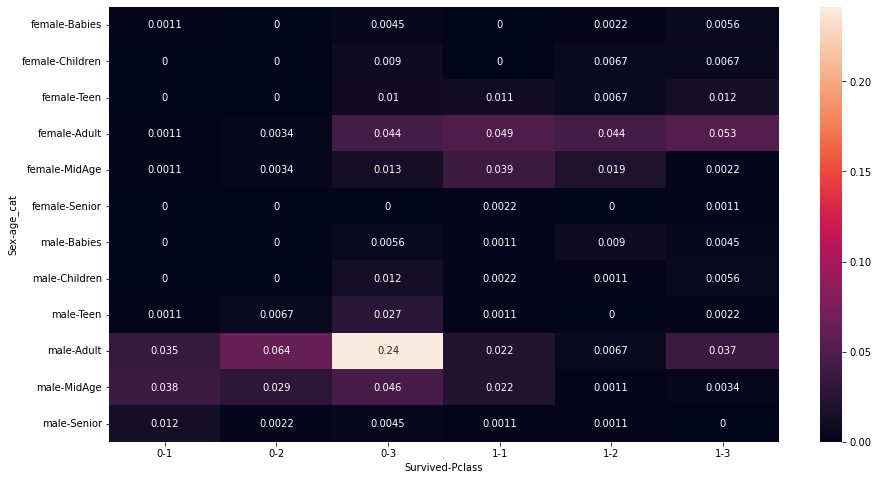

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))
sns.heatmap(pd.crosstab( index= [df['Survived'], df['Pclass']], 
                        columns = [df['Sex'], df['age_cat']], normalize=True).T, 
            annot=True) # para evitar notação científica, usar fmt='g'